# KMeans Clustering Algorithm Research
Research start date: 24/08/2020
Research end date: 27/08/2020

Source: https://medium.com/@fauziyahdewi16/k-means-clustering-with-scikit-learn-in-python-b8e7835d9753

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Import dataset
air = pd.read_csv("AirQuality.csv", sep=";")
air.head()
air.shape

(9471, 17)

### Preprocessing

In [3]:
#dropna
air = air[["NMHC(GT)", "RH"]].dropna()
#shape after
air.shape

(9357, 2)

In [4]:
# comma to dot conversion
air["RH"] = air["RH"].str.replace(',','.')
air = air.astype('float')
air

,NMHC(GT),RH
0,150.0,48.9
1,112.0,47.7
2,88.0,54.0
3,80.0,60.0
4,51.0,59.6
...,...,...
9352,-200.0,29.3
9353,-200.0,23.7
9354,-200.0,18.3
9355,-200.0,13.5


In [5]:
#Information
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NMHC(GT)  9357 non-null   float64
 1   RH        9357 non-null   float64
dtypes: float64(2)
memory usage: 219.3 KB


### Raw Data Visualization

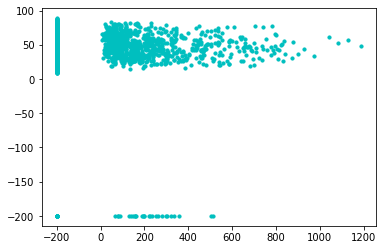

In [6]:
#Visualisasi Data
plt.scatter(air["NMHC(GT)"], air["RH"], s=10, c="c", marker="o", alpha=1)
plt.show()

### Apply K-means

In [7]:
#Buat cluster
air_x = air.iloc[:, 0:2]
air_x.head()

,NMHC(GT),RH
0,150.0,48.9
1,112.0,47.7
2,88.0,54.0
3,80.0,60.0
4,51.0,59.6


In [8]:
#Transform to numpy array
x_array = np.array(air_x)
print(x_array)

[[ 150.    48.9]
 [ 112.    47.7]
 [  88.    54. ]
 ...
 [-200.    18.3]
 [-200.    13.5]
 [-200.    13.1]]


In [9]:
# Scaling Method
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.25197984, 0.86214063],
       [0.22462203, 0.85798407],
       [0.20734341, 0.87980603],
       ...,
       [0.        , 0.75614825],
       [0.        , 0.739522  ],
       [0.        , 0.73813647]])

In [10]:
#K-means
kmeans = KMeans(n_clusters=5, random_state=123)
kmeans.fit(x_scaled)

#5 centroid location
print(kmeans.cluster_centers_)
air["kluster"] = kmeans.labels_

[[-1.90819582e-16  8.11455564e-01]
 [ 2.25995035e-02 -9.99200722e-16]
 [ 5.52722710e-01  8.50208892e-01]
 [-1.59594560e-16  9.12542316e-01]
 [ 2.37826059e-01  8.69200820e-01]]


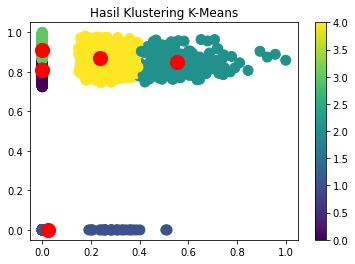

In [11]:
#visualisasi final
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s=100, c=air.kluster, marker="o", alpha=1)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="red", s=200, alpha=1, marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar(output)
plt.show()